<a href="https://colab.research.google.com/github/ayush-singh110/ASIANPAINTS_CLOSING_STOCKS_PREDICTION_USING_LSTM/blob/main/asianpaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.compose import ColumnTransformer
!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM



In [2]:
df=pd.read_csv('ASIANPAINT.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
df.drop(['Symbol','Series','Trades','Deliverable Volume','%Deliverble'],inplace=True,axis=1)

In [5]:
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover'],
      dtype='object')

In [6]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11
1,2000-01-04,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11
2,2000-01-05,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10
3,2000-01-06,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11
4,2000-01-07,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11


In [7]:
df['Date'].unique()

array(['2000-01-03', '2000-01-04', '2000-01-05', ..., '2021-04-28',
       '2021-04-29', '2021-04-30'], dtype=object)

In [8]:
df['Year']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Day']=df['Date'].str.split('-').str[2]

In [15]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Year,Month,Day
0,2000-01-03,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,2000,01,03
1,2000-01-04,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,2000,01,04
2,2000-01-05,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,2000,01,05
3,2000-01-06,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,2000,01,06
4,2000-01-07,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,2000,01,07


In [9]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.drop(['Year','Month','Day'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5306 non-null   datetime64[ns]
 1   Prev Close  5306 non-null   float64       
 2   Open        5306 non-null   float64       
 3   High        5306 non-null   float64       
 4   Low         5306 non-null   float64       
 5   Last        5306 non-null   float64       
 6   Close       5306 non-null   float64       
 7   VWAP        5306 non-null   float64       
 8   Volume      5306 non-null   int64         
 9   Turnover    5306 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 414.7 KB


In [13]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [33]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Year,Month,Day
0,2000-01-03,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,2000,1,3
1,2000-01-04,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,2000,1,4
2,2000-01-05,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,2000,1,5
3,2000-01-06,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,2000,1,6
4,2000-01-07,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,2000,1,7


In [14]:
df.drop('Date',inplace=True,axis=1)

In [15]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Year,Month,Day
0,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,2000,1,3
1,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,2000,1,4
2,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,2000,1,5
3,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,2000,1,6
4,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,2000,1,7


<Axes: xlabel='Year', ylabel='Volume'>

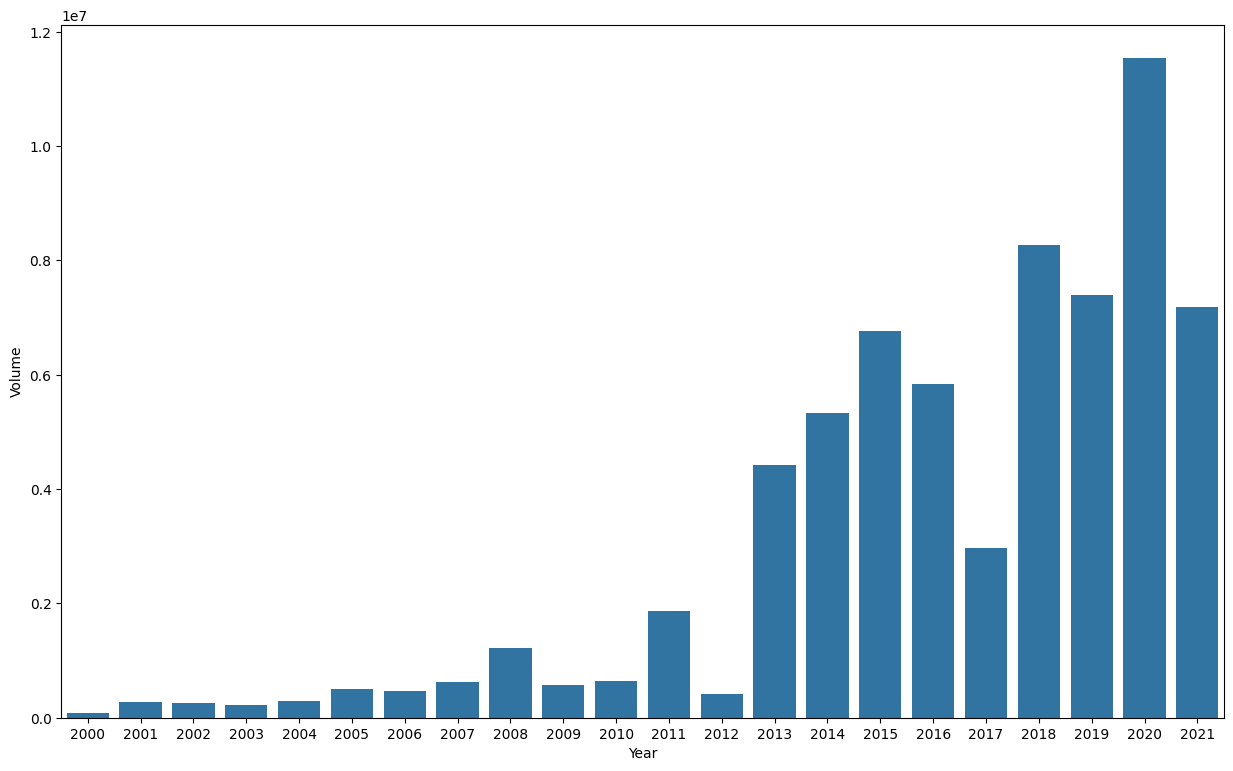

In [16]:
max_year=df.groupby('Year')['Volume'].max()
plt.figure(figsize=(15,9))
sns.barplot(x=max_year.index,y=max_year)

<Axes: xlabel='Year', ylabel='High'>

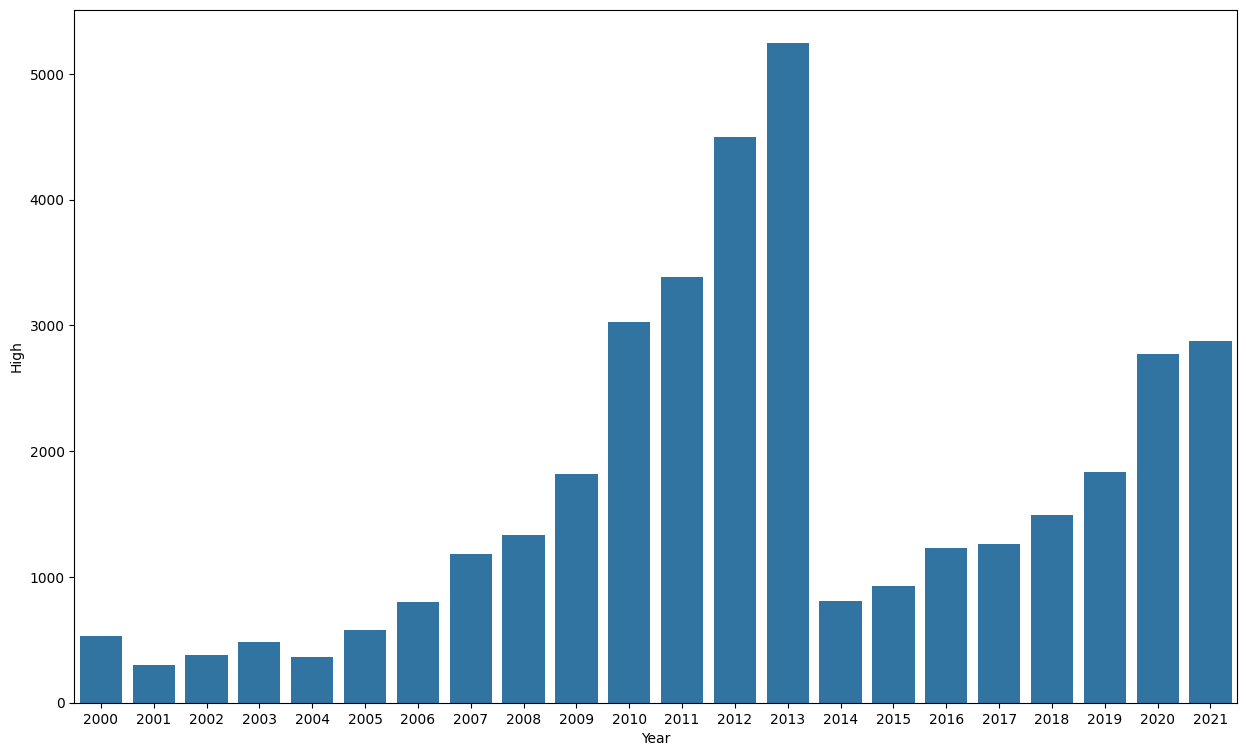

In [17]:
max_high=df.groupby('Year')['High'].max()
plt.figure(figsize=(15,9))
sns.barplot(x=max_high.index,y=max_high)

<Axes: xlabel='Year', ylabel='VWAP'>

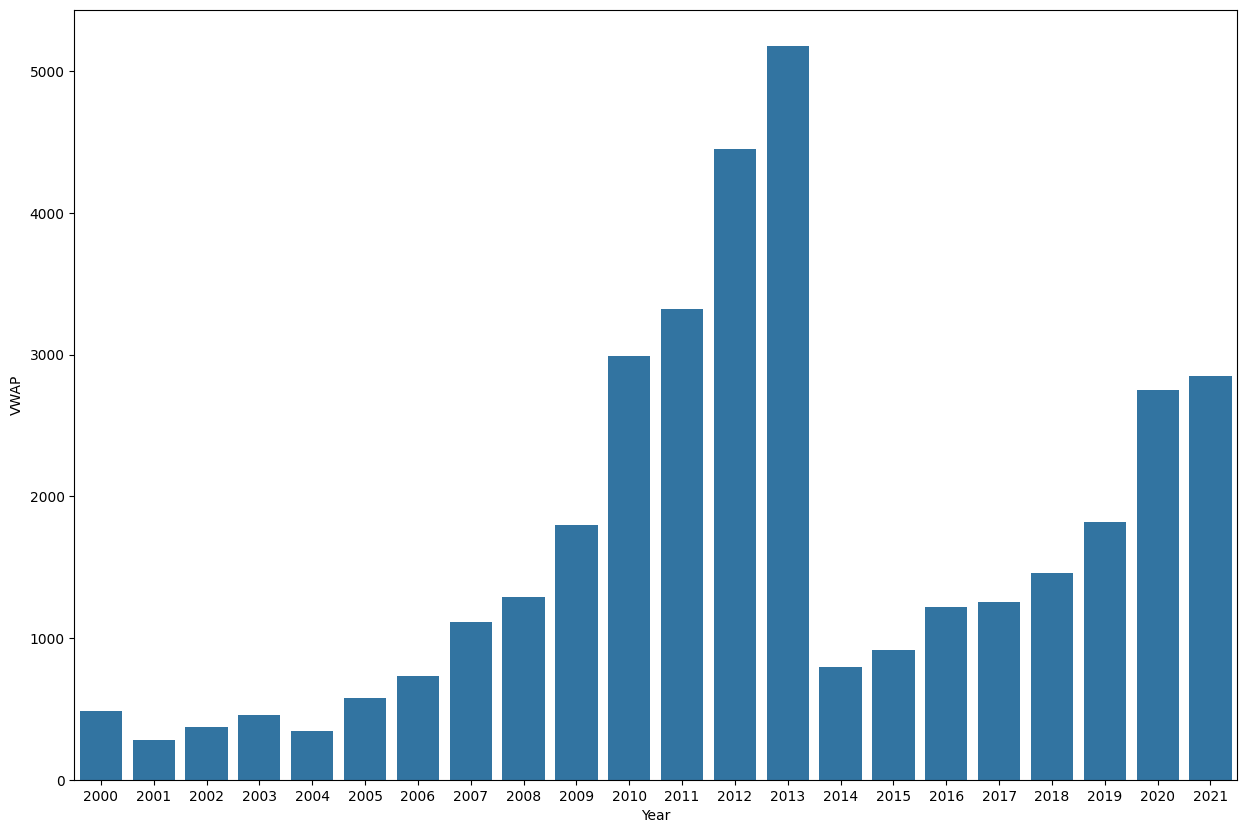

In [18]:
max_vwap=df.groupby('Year')['VWAP'].max()
plt.figure(figsize=(15,10))
sns.barplot(x=max_vwap.index,y=max_vwap)

<Axes: xlabel='Year', ylabel='Volume'>

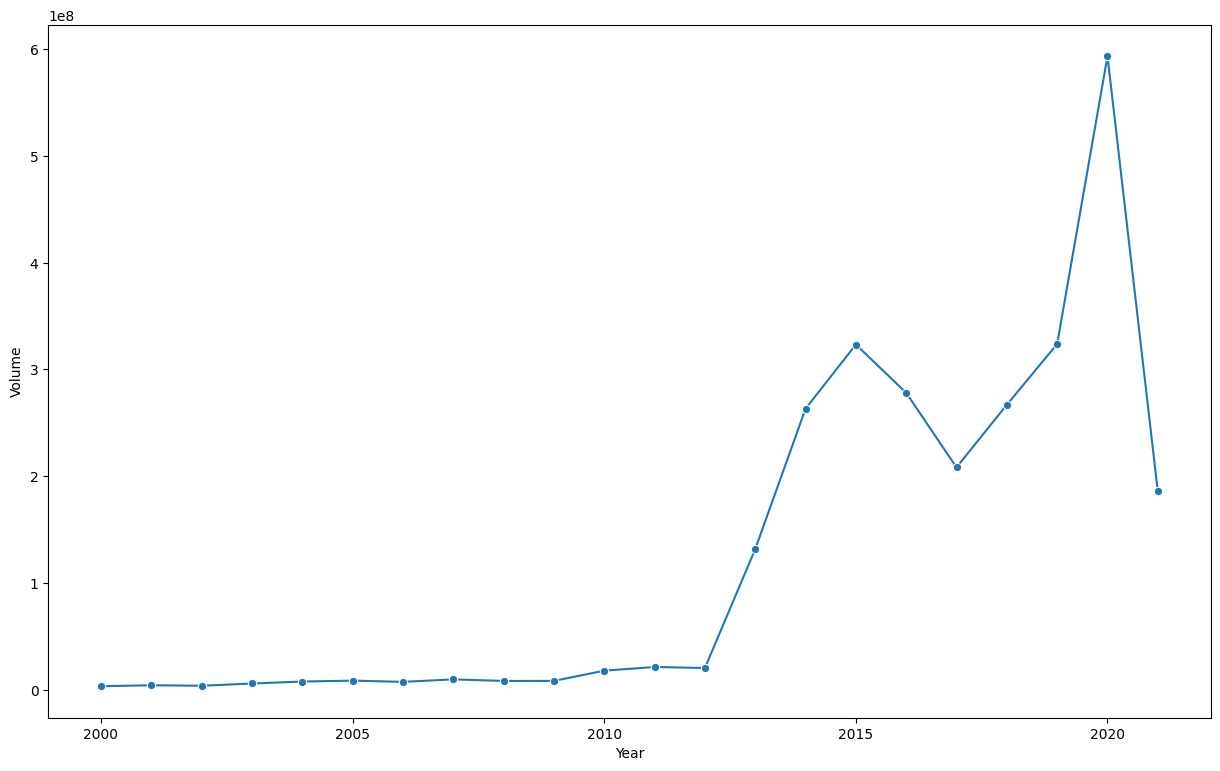

In [19]:
yearly_vol=df.groupby('Year')['Volume'].sum()
plt.figure(figsize=(15,9))
sns.lineplot(x=yearly_vol.index,y=yearly_vol,marker='o')

In [20]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Year,Month,Day
Prev Close,1.000000,0.998182,0.998060,0.998052,0.997957,0.997971,0.998090,0.063167,0.201938,0.449105,-0.016104,-0.000888
Open,0.998182,1.000000,0.999812,0.999796,0.999675,0.999690,0.999811,0.063239,0.202815,0.449631,-0.015828,-0.002168
High,0.998060,0.999812,1.000000,0.999734,0.999847,0.999862,0.999915,0.064726,0.204727,0.448570,-0.016640,-0.001292
Low,0.998052,0.999796,0.999734,1.000000,0.999809,0.999827,0.999887,0.062464,0.201814,0.449772,-0.015682,-0.002154
Last,0.997957,0.999675,0.999847,0.999809,1.000000,0.999988,0.999938,0.064042,0.203676,0.449251,-0.016125,-0.001643
Close,0.997971,0.999690,0.999862,0.999827,0.999988,1.000000,0.999956,0.063873,0.203513,0.449203,-0.016155,-0.001567
VWAP,0.998090,0.999811,0.999915,0.999887,0.999938,0.999956,1.000000,0.063568,0.203238,0.449050,-0.016115,-0.001738
Volume,0.063167,0.063239,0.064726,0.062464,0.064042,0.063873,0.063568,1.000000,0.906809,0.665880,-0.003498,0.034920
Turnover,0.201938,0.202815,0.204727,0.201814,0.203676,0.203513,0.203238,0.906809,1.000000,0.604953,-0.020828,0.027977
Year,0.449105,0.449631,0.448570,0.449772,0.449251,0.449203,0.449050,0.665880,0.604953,1.000000,-0.032789,-0.002449


<Axes: >

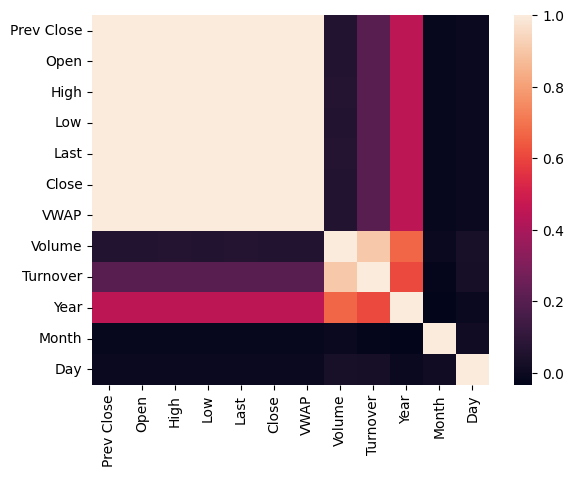

In [21]:
sns.heatmap(df.corr())

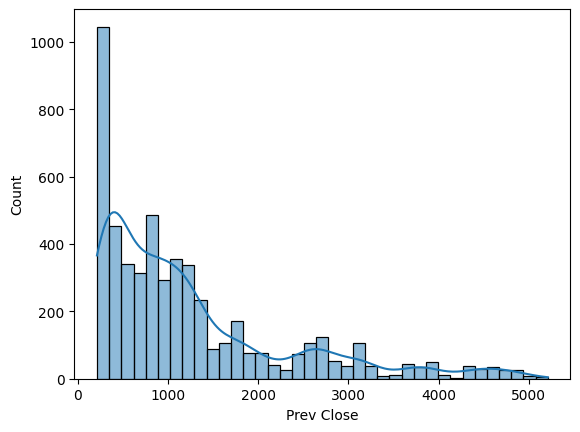

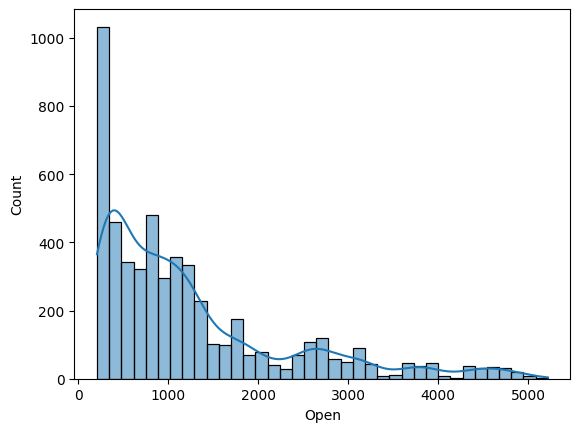

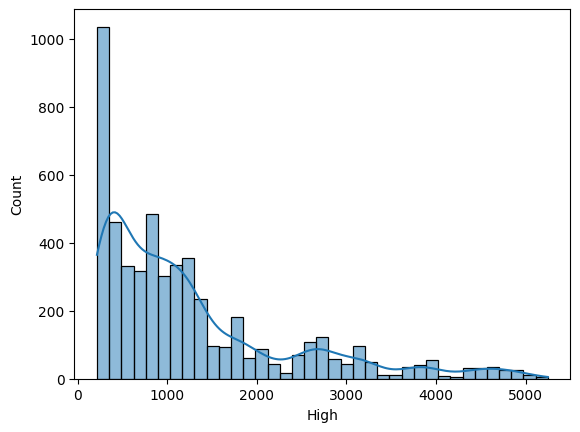

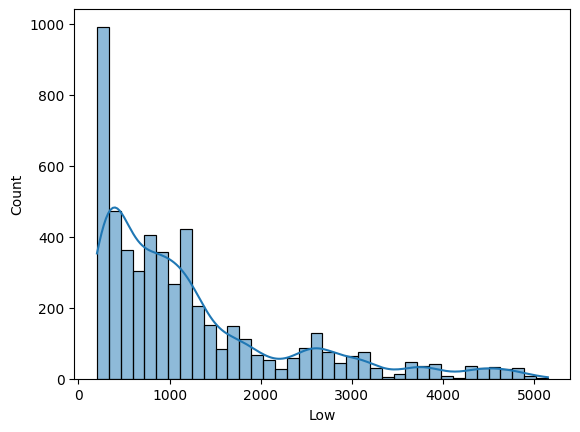

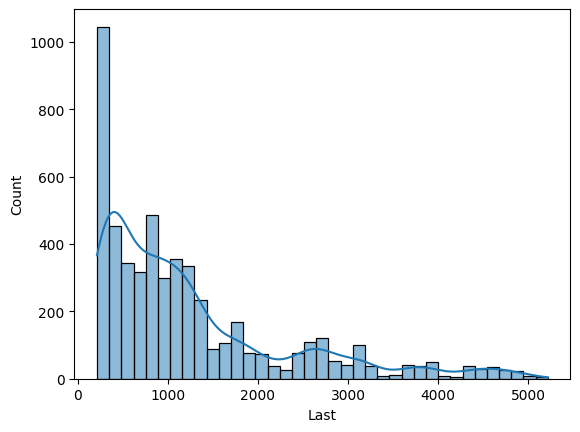

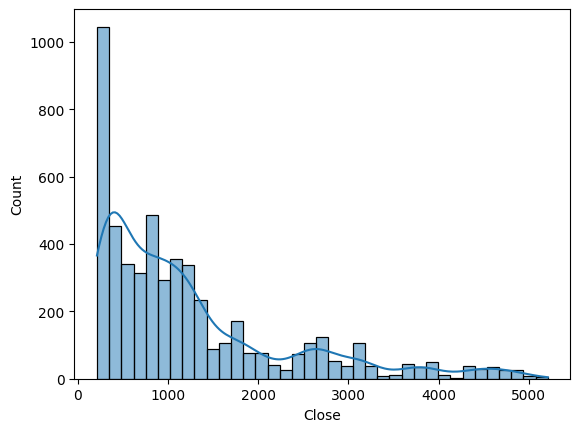

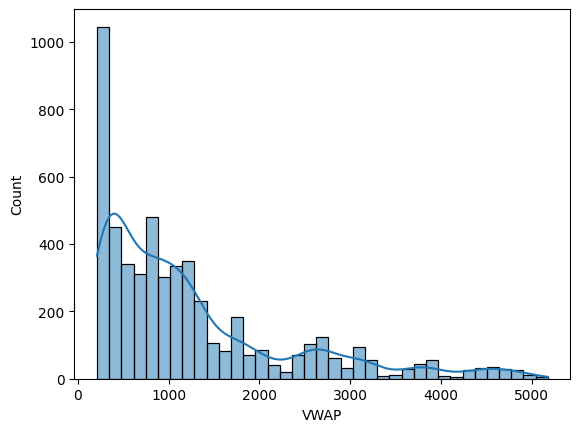

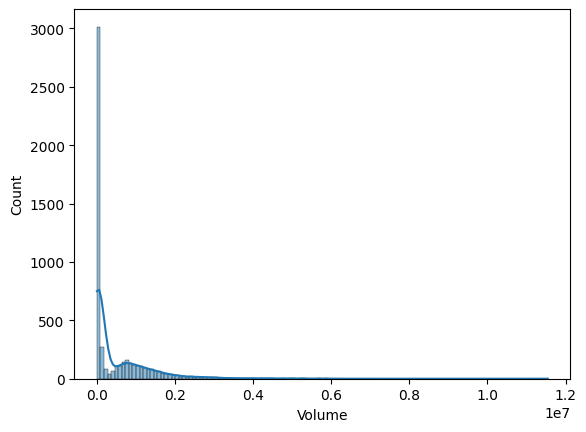

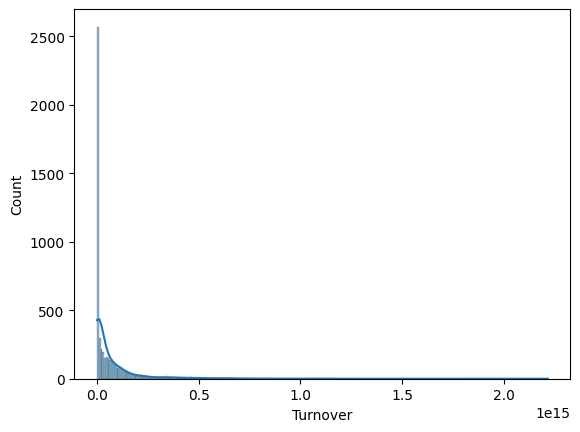

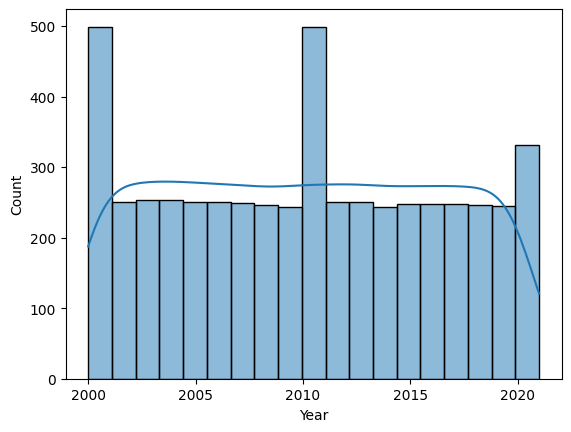

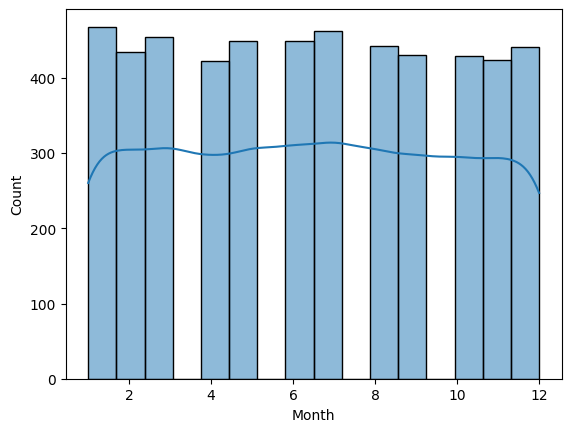

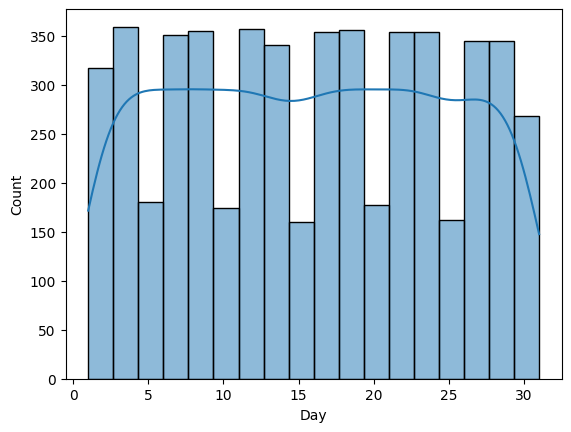

In [22]:
for i in df.columns:
  sns.histplot(x=i,data=df,kde=True)
  plt.show()

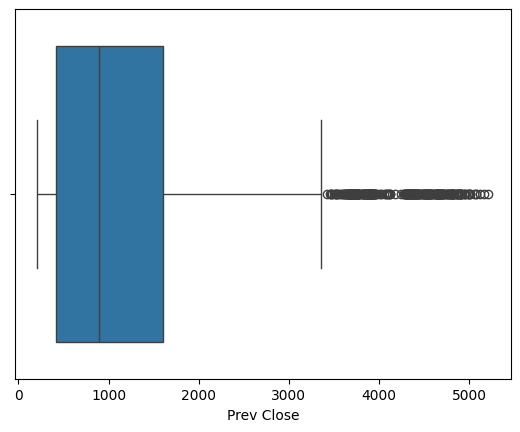

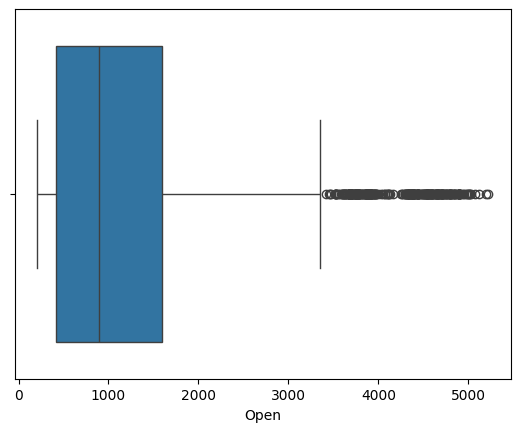

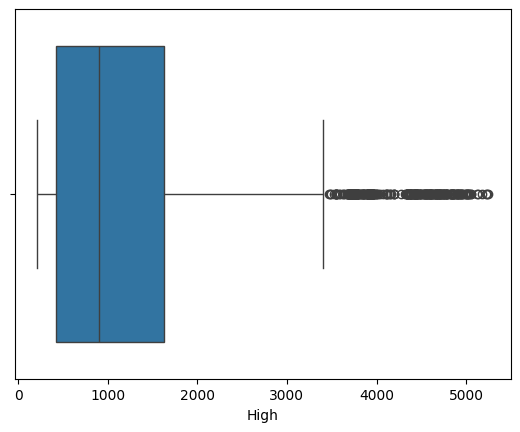

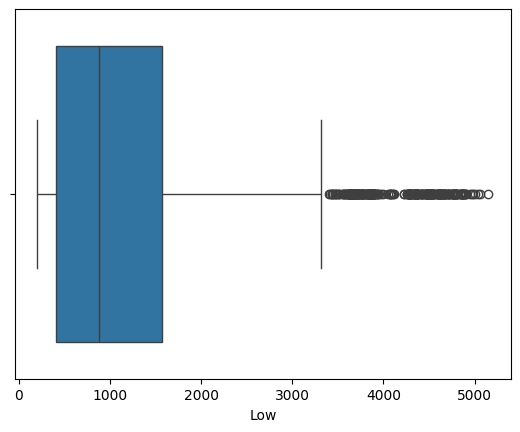

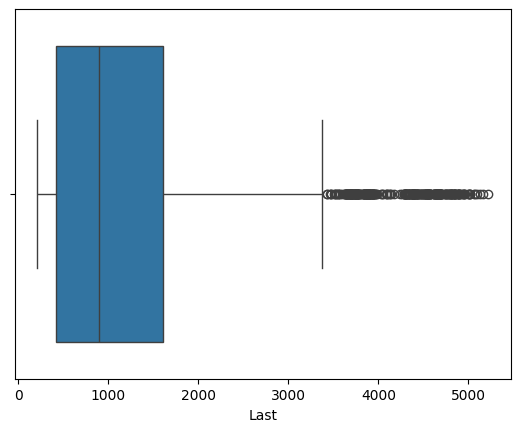

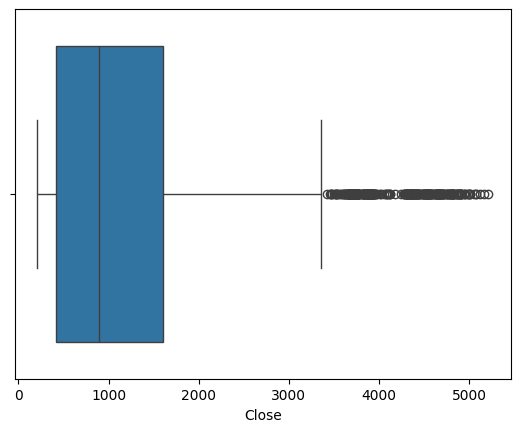

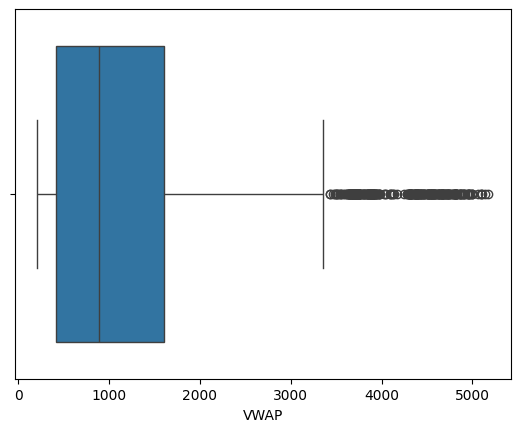

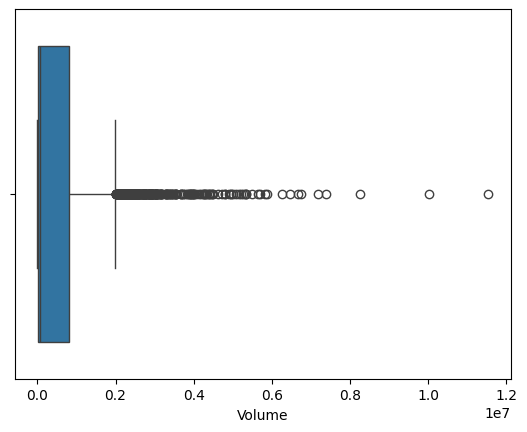

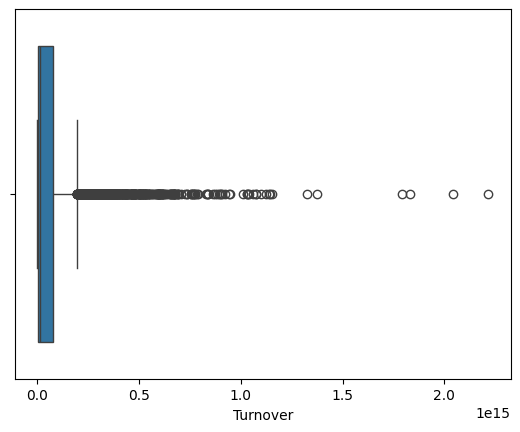

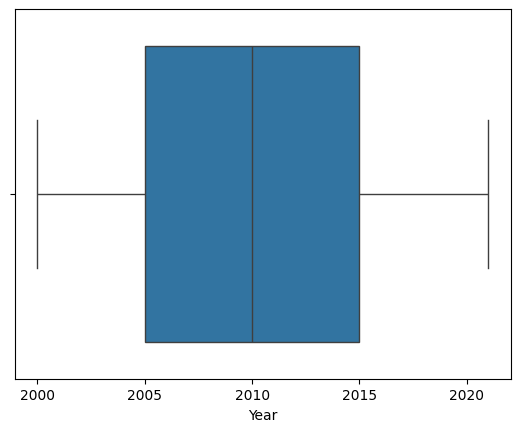

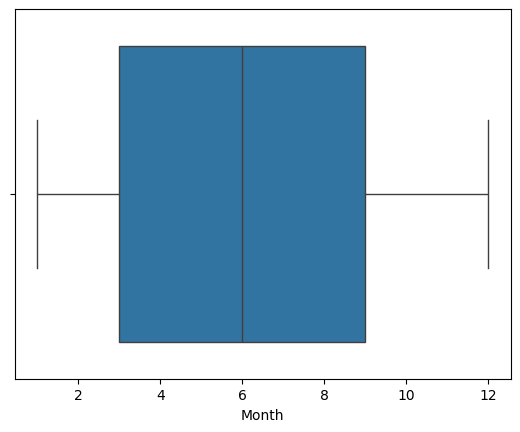

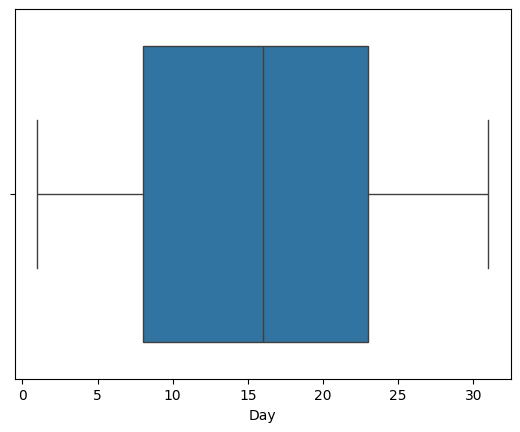

In [23]:
for i in df.columns:
  sns.boxplot(x=i,data=df)
  plt.show()

In [25]:
X=df.drop('Close',axis=1)
y=df['Close']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
st=StandardScaler()
qt=QuantileTransformer(output_distribution='normal')
ct=ColumnTransformer(
    [('scaler',st,X_train.columns),
     ('quant',qt,X_train.columns)]
)

In [43]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [84]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model=Sequential()

# First LSTM layer: return_sequences=True to pass sequences to the next LSTM
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# Second LSTM layer: return_sequences=False to output to the Dense layer
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
model.compile(optimizer='adam',loss='mae')

In [86]:
history=model.fit(X_train_reshaped,y_train,epochs=100,validation_data=(X_test_reshaped,y_test))

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1273.4384 - val_loss: 1161.6667
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1275.2783 - val_loss: 1150.0151
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1261.9193 - val_loss: 1142.0570
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1218.7938 - val_loss: 1134.8690
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1263.7258 - val_loss: 1127.9987
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1197.4624 - val_loss: 1121.3044
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1206.6577 - val_loss: 1114.7209
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1217.7437 - val_loss: 1108.2133
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1198.8306 - val_loss: 1101.7606
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1181.0983 - val_loss: 1095.3496
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1170.28

In [87]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

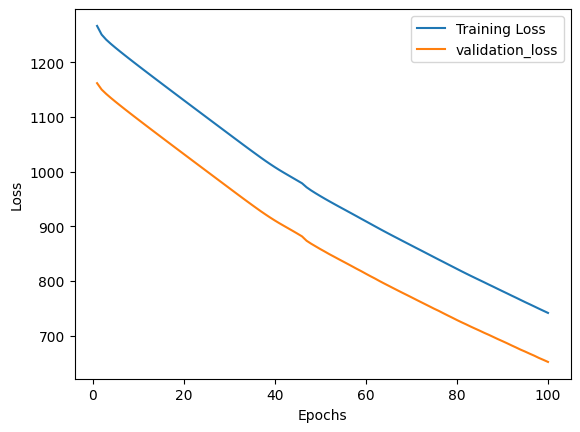

In [88]:
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()